In [ ]:
# https://chatbotslife.com/cnn-image-classification-using-cifar-10-dataset-on-google-colab-tpu-750da8cd8510
# https://github.com/santanu13/CIFAR_10_Classification_TPU/blob/master/CIFAR_10_CLASSIFICATION_TPU.ipynb

In [ ]:
#Import libraries

import os
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

#Download dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape)

(50000, 32, 32, 3)


In [ ]:
# 產生標籤
name2num = {'airplane' : 0,
            'automobile' : 1,
            'bird' : 2,
            'cat' : 3,
            'deer' : 4,
            'dog' : 5,
            'frog' : 6,
            'horse' : 7,
            'ship' : 8,
            'truck' : 9}
num2name = dict([(v,k) for (k,v) in name2num.items()])
num2name

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

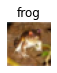

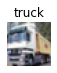

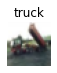

In [ ]:
# 檢查樣本
import matplotlib.pyplot as plt
for i in range(3):
    plt.figure(figsize=(0.8, 0.8))
    plt.title(num2name.get(y_train[i][0]))
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.show()

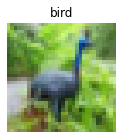

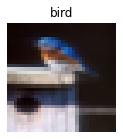

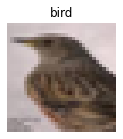

In [ ]:
# 請幫忙顯示十張truck
# x_train, y_train
# 'truck' : 9
model = 2
x_train_truck = x_train[y_train.flatten()==model]

import matplotlib.pyplot as plt
for i in range(3):
    plt.figure(figsize=(2, 2))
    plt.title(num2name.get(model))
    plt.imshow(x_train_truck[i])
    plt.axis('off')
    plt.show()

In [ ]:
# 建置model 
# 導入函式庫
import numpy as np  
import keras
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  

# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=128, input_dim=32*32*3, kernel_initializer='normal', activation='relu')) 
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               393344    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 檢視是否需要將數據進行處理 /255.0
x_train[0].min(), x_train[0].max()

(0, 255)

In [ ]:
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 
X_train_2D = x_train.reshape(x_train.shape[0], 32*32*3).astype('float32')  
X_test_2D = x_test.reshape(x_test.shape[0], 32*32*3).astype('float32')    
x_Train_norm = X_train_2D /255.0  #<------
x_Test_norm = X_test_2D   /255.0  #<------

In [ ]:
# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, 
                          validation_split=0.2, epochs=30, 
                          batch_size=800, verbose=2)  

Epoch 1/30
50/50 - 2s - loss: 2.0653 - accuracy: 0.2537 - val_loss: 1.9204 - val_accuracy: 0.3244 - 2s/epoch - 43ms/step
Epoch 2/30
50/50 - 2s - loss: 1.8632 - accuracy: 0.3461 - val_loss: 1.8391 - val_accuracy: 0.3551 - 2s/epoch - 32ms/step
Epoch 3/30
50/50 - 2s - loss: 1.7874 - accuracy: 0.3762 - val_loss: 1.7876 - val_accuracy: 0.3741 - 2s/epoch - 33ms/step
Epoch 4/30
50/50 - 2s - loss: 1.7389 - accuracy: 0.3922 - val_loss: 1.7598 - val_accuracy: 0.3831 - 2s/epoch - 34ms/step
Epoch 5/30
50/50 - 2s - loss: 1.6966 - accuracy: 0.4059 - val_loss: 1.7136 - val_accuracy: 0.4006 - 2s/epoch - 33ms/step
Epoch 6/30
50/50 - 2s - loss: 1.6599 - accuracy: 0.4200 - val_loss: 1.6874 - val_accuracy: 0.4069 - 2s/epoch - 33ms/step
Epoch 7/30
50/50 - 2s - loss: 1.6371 - accuracy: 0.4256 - val_loss: 1.6690 - val_accuracy: 0.4185 - 2s/epoch - 33ms/step
Epoch 8/30
50/50 - 2s - loss: 1.6156 - accuracy: 0.4323 - val_loss: 1.6540 - val_accuracy: 0.4223 - 2s/epoch - 33ms/step
Epoch 9/30
50/50 - 2s - loss: 1.

In [ ]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  

313/313 [==============================] - 1s 2ms/step - loss: 1.4780 - accuracy: 0.4807

	[Info] Accuracy of testing data = 48.1%


In [ ]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Train_norm, y_TrainOneHot)  
print()  
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1]*100.0))

1563/1563 [==============================] - 3s 2ms/step - loss: 1.3980 - accuracy: 0.5113

	[Info] Accuracy of training data = 51.1%


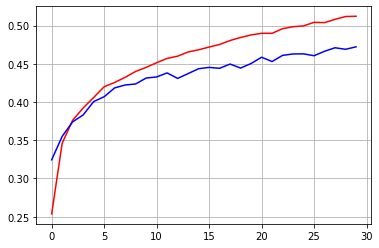

In [ ]:
%matplotlib inline
# accuracy chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], color='red')
plt.plot(train_history.history['val_accuracy'], color='blue')
plt.grid()
plt.show()

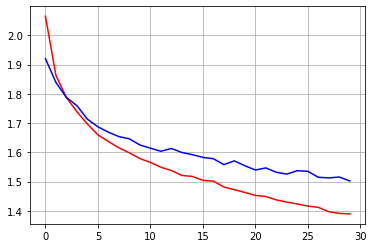

In [ ]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color='red')
plt.plot(train_history.history['val_loss'], color='blue')
plt.grid()
plt.show()